In [ ]:
!pip install pycuda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2024.1.2-cp310-cp310-linux_x86_64.whl size=660546 sha256=0722942047909d6e4ee95ad07bdc179b6aa6c82f84be80460295f28d94791f3d
  Stored in directory: /root/.cache/pip/wheels/70/63/40/4bf006182f942d3516b71bb2ff3b57ccbdb8b2c0ee81882b6e
Successfully built pycuda


In [ ]:
pip freeze > requirements.txt

In [ ]:
#PyCuda Modules
import pycuda
import pycuda.autoinit
import pycuda.driver as cuda
import pycuda.driver as drv
import pycuda.gpuarray as gpuarray
from pycuda.compiler import SourceModule

#Numerical processing and plotting libraries
import numpy as np
import matplotlib.pyplot as plt

#Utility functions and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from typing import Tuple, Optional
import contextlib
from tqdm import tqdm

In [ ]:
S = np.array([[[1, 1, 1, 1, 1],
                    [1, 0, 0, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [1, 1, 1, 1, 1]],
                   [[0, 1, 1, 1, 0],
                    [1, 0, 0, 0, 0],
                    [0, 1, 1, 1, 0],
                    [0, 0, 0, 0, 1],
                    [0, 1, 1, 1, 0]],
                   [[0, 1, 1, 1, 1],
                    [1, 0, 0, 0, 0],
                    [0, 1, 1, 1, 0],
                    [0, 0, 0, 0, 1],
                    [1, 1, 1, 1, 0]],
                   [[0, 1, 1, 1, 1],
                    [1, 0, 0, 0, 0],
                    [0, 1, 1, 1, 0],
                    [1, 0, 0, 0, 1],
                    [1, 1, 1, 1, 0]],
                   [[0, 1, 1, 1, 0],
                    [1, 0, 0, 0, 1],
                    [0, 1, 1, 1, 0],
                    [1, 0, 0, 0, 1],
                    [1, 1, 1, 1, 0]],
                   [[0, 1, 1, 1, 1],
                    [1, 0, 0, 0, 0],
                    [0, 1, 1, 1, 0],
                    [0, 0, 0, 0, 1],
                    [1, 1, 1, 1, 0]],
                   [[1, 1, 1, 1, 0],
                    [1, 0, 0, 0, 0],
                    [1, 1, 1, 1, 0],
                    [0, 0, 0, 1, 0],
                    [1, 1, 1, 1, 0]],
                   [[0, 1, 1, 1, 1],
                    [0, 1, 0, 0, 0],
                    [0, 1, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 1, 1, 1, 1]],
                   [[0, 1, 1, 1, 0],
                    [0, 1, 0, 0, 0],
                    [0, 1, 1, 1, 0],
                    [0, 0, 0, 1, 0],
                    [0, 1, 1, 1, 0]],
                   [[1, 1, 1, 0, 0],
                    [1, 0, 0, 0, 0],
                    [1, 1, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 0, 0]]]
                 ).reshape(-1, 25)

H = np.array([
                   [[1, 0, 0, 0, 1],
                    [1, 0, 0, 0, 1],
                    [1, 1, 1, 1, 1],
                    [1, 0, 0, 0, 1],
                    [1, 0, 0, 0, 1]],

                   [[1, 0, 0, 0, 1],
                    [1, 0, 1, 0, 1],
                    [1, 1, 1, 1, 1],
                    [1, 0, 1, 0, 1],
                    [1, 0, 0, 0, 1]],

                   [[1, 0, 0, 0, 1],
                    [1, 1, 0, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 0, 1, 1],
                    [1, 0, 0, 0, 1]],

                   [[1, 0, 0, 1, 1],
                    [1, 0, 0, 0, 1],
                    [1, 1, 1, 1, 1],
                    [1, 0, 0, 0, 1],
                    [1, 1, 0, 0, 1]],

                   [[1, 0, 0, 0, 1],
                    [1, 0, 0, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 0, 0, 1],
                    [1, 0, 0, 0, 1]],

                   [[1, 0, 0, 0, 1],
                    [1, 1, 0, 0, 1],
                    [1, 1, 1, 1, 1],
                    [1, 0, 0, 1, 1],
                    [1, 0, 0, 0, 1]],

                   [[1, 0, 0, 0, 1],
                    [1, 0, 0, 0, 1],
                    [1, 1, 1, 1, 1],
                    [1, 0, 0, 0, 1],
                    [1, 0, 0, 1, 1]],

                   [[1, 0, 0, 1, 1],
                    [1, 0, 0, 0, 1],
                    [1, 1, 1, 1, 1],
                    [1, 0, 0, 1, 1],
                    [1, 0, 0, 0, 1]],

                   [[1, 0, 0, 0, 1],
                    [1, 0, 1, 0, 1],
                    [1, 1, 1, 1, 1],
                    [1, 0, 0, 0, 1],
                    [1, 0, 0, 1, 1]],

                   [[1, 0, 0, 0, 1],
                    [1, 1, 0, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 0, 0, 1],
                    [1, 0, 0, 0, 1]]
                 ]).reshape(-1, 25)

A = np.array([
                      [[0, 0, 1, 0, 0],
                      [0, 1, 0, 1, 0],
                      [0, 1, 1, 1, 0],
                      [0, 1, 0, 1, 0],
                      [0, 1, 0, 1, 0]],

                      [[0, 0, 1, 0, 0],
                      [0, 1, 1, 1, 0],
                      [1, 0, 0, 0, 1],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0]],

                      [[0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0],
                      [0, 1, 1, 1, 0],
                      [1, 0, 0, 0, 1]],

                      [[0, 1, 0, 0, 0],
                      [1, 0, 1, 0, 0],
                      [1, 1, 1, 0, 0],
                      [1, 0, 1, 0, 0],
                      [1, 0, 1, 0, 0]],

                      [[0, 0, 0, 1, 0],
                      [0, 0, 1, 0, 1],
                      [0, 0, 1, 1, 1],
                      [0, 0, 1, 0, 1],
                      [0, 0, 1, 0, 1]],

                      [[0, 0, 1, 1, 0],
                      [0, 1, 0, 0, 1],
                      [0, 1, 1, 1, 1],
                      [0, 1, 0, 0, 0],
                      [0, 1, 0, 0, 1]],

                      [[0, 1, 1, 0, 0],
                      [1, 0, 0, 1, 0],
                      [1, 1, 1, 1, 0],
                      [1, 0, 0, 1, 0],
                      [1, 0, 0, 1, 0]],

                      [[0, 1, 0, 0, 0],
                      [1, 0, 1, 0, 0],
                      [1, 1, 1, 0, 0],
                      [1, 0, 1, 0, 0],
                      [0, 0, 0, 0, 0]],

                      [[0, 0, 0, 1, 0],
                      [0, 0, 1, 0, 1],
                      [0, 0, 1, 1, 1],
                      [0, 0, 1, 0, 1],
                      [0, 0, 0, 0, 0]],

                      [[0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0],
                      [0, 1, 1, 1, 0],
                      [1, 0, 0, 0, 1],
                      [0, 0, 0, 0, 0]]
                  ]).reshape(-1, 25)

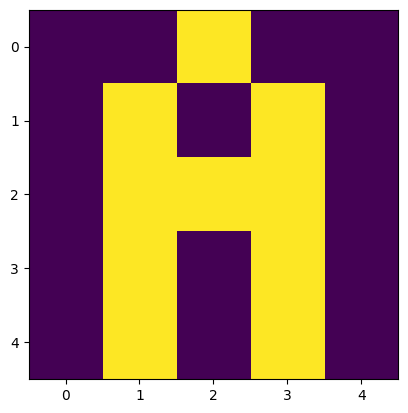

In [ ]:
plt.imshow(A[0].reshape(5, 5))

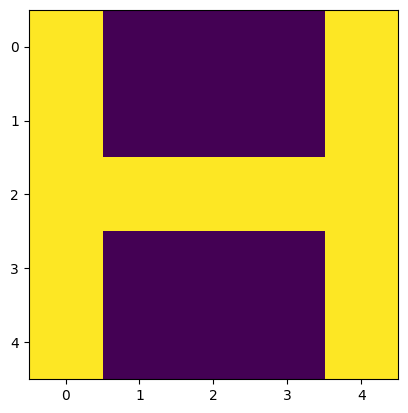

In [ ]:
plt.imshow(H[0].reshape(5, 5))

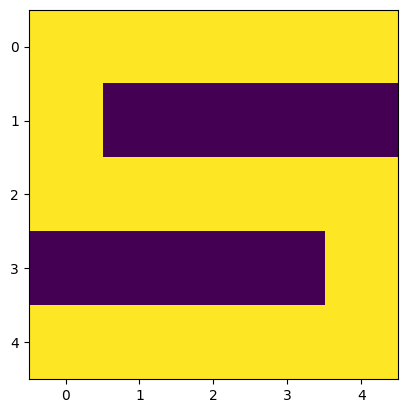

In [ ]:
plt.imshow(S[0].reshape(5, 5))

In [ ]:
dataset = []
labels = []

data_sources = [S, H, A]
for label, data in enumerate(data_sources):
    dataset.append(data)
    labels.extend([label] * len(data))

dataset = np.concatenate(dataset, axis=0)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(dataset, labels, train_size = 0.8)

In [ ]:
mod = SourceModule("""
__device__ inline int get_offset(int row, int col, int width) {
    return row * width + col;
}

__device__ inline float relu(float x) {
    return fmaxf(0.0f, x);
}

__device__ inline float relu_derivative(float x) {
    return x > 0.0f ? 1.0f : 0.0f;
}

__global__ void forward(const float* input, const float* w1, const float* w2,
                       float* z1, float* z2,
                       const int input_size, const int hidden_size,
                       const int output_size, const int batch_size) {
    const int batch_idx = blockIdx.x;
    const int thread_idx = threadIdx.x;

    if (thread_idx < hidden_size) {
        float sum = 0.0f;
        const int hidden_offset = get_offset(batch_idx, thread_idx, hidden_size);

        #pragma unroll 4
        for (int i = 0; i < input_size; i++) {
            sum += input[get_offset(batch_idx, i, input_size)] *
                   w1[get_offset(i, thread_idx, hidden_size)];
        }

        z1[hidden_offset] = relu(sum);
    }

    __syncthreads();

    if (thread_idx < output_size) {
        float sum = 0.0f;
        const int output_offset = get_offset(batch_idx, thread_idx, output_size);

        #pragma unroll 4
        for (int j = 0; j < hidden_size; j++) {
            sum += z1[get_offset(batch_idx, j, hidden_size)] *
                   w2[get_offset(j, thread_idx, output_size)];
        }

        z2[output_offset] = sum;  // No activation for output layer
    }
}

__global__ void backprop(const float* input, const float* z1, const float* z2,
                        const float* target, float* w1, float* w2,
                        const int input_size, const int hidden_size,
                        const int output_size, const int batch_size,
                        const float learning_rate) {
    const int batch_idx = blockIdx.x;
    const int thread_idx = threadIdx.x;

    if (thread_idx < output_size) {
        const int output_offset = get_offset(batch_idx, thread_idx, output_size);
        const float delta2 = z2[output_offset] - target[output_offset];

        #pragma unroll 4
        for (int j = 0; j < hidden_size; j++) {
            const float gradient = delta2 * z1[get_offset(batch_idx, j, hidden_size)];
            atomicAdd(&w2[get_offset(j, thread_idx, output_size)],
                     -learning_rate * gradient);
        }
    }

    if (thread_idx < hidden_size) {
        float delta1 = 0.0f;
        const int hidden_offset = get_offset(batch_idx, thread_idx, hidden_size);

        #pragma unroll 4
        for (int k = 0; k < output_size; k++) {
            const float output_error = z2[get_offset(batch_idx, k, output_size)] -
                                     target[get_offset(batch_idx, k, output_size)];
            delta1 += output_error * w2[get_offset(thread_idx, k, output_size)];
        }

        delta1 *= relu_derivative(z1[hidden_offset]);

        #pragma unroll 4
        for (int i = 0; i < input_size; i++) {
            const float gradient = delta1 * input[get_offset(batch_idx, i, input_size)];
            atomicAdd(&w1[get_offset(i, thread_idx, hidden_size)],
                     -learning_rate * gradient);
        }
    }
}
""")

forward_kernel = mod.get_function("forward")
backprop_kernel = mod.get_function("backprop")

In [ ]:
class ANN:
    def __init__(self,
                 input_size: int = 25,
                 hidden_size: int = 10,
                 output_size: int = 3,
                 learning_rate: float = 0.01):
        """
        Initialize the Neural Network with GPU support.

        Args:
            input_size: Number of input features
            hidden_size: Number of neurons in hidden layer
            output_size: Number of output classes
            learning_rate: Learning rate for gradient descent
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights using He initialization
        self.w1 = np.random.randn(input_size, hidden_size).astype(np.float32) * np.sqrt(2.0 / input_size)
        self.w2 = np.random.randn(hidden_size, output_size).astype(np.float32) * np.sqrt(2.0 / hidden_size)

        # Load CUDA kernels
        self.forward_kernel = mod.get_function("forward")
        self.backprop_kernel = mod.get_function("backprop")

        # Transfer weights to GPU
        self.w1_gpu = gpuarray.to_gpu(self.w1)
        self.w2_gpu = gpuarray.to_gpu(self.w2)

        # Set block and grid dimensions
        self.block_dim = (max(self.hidden_size, self.output_size), 1, 1)

    @staticmethod
    def softmax(x: np.ndarray) -> np.ndarray:
        """
        Compute softmax values for each set of scores in x.
        Uses numerically stable computation.
        """
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    @contextlib.contextmanager
    def gpu_arrays(self, batch_size: int, include_targets: bool = True) -> Tuple[gpuarray.GPUArray, ...]:
        """
        Context manager for GPU array allocation and cleanup.
        """
        arrays = []
        try:
            # Allocate GPU arrays
            z1_gpu = gpuarray.zeros((batch_size, self.hidden_size), dtype=np.float32)
            z2_gpu = gpuarray.zeros((batch_size, self.output_size), dtype=np.float32)
            arrays.extend([z1_gpu, z2_gpu])

            yield arrays
        finally:
            # Clean up GPU memory
            for array in arrays:
                array.gpudata.free()

    def train_batch(self, batch_x: np.ndarray, batch_y: np.ndarray) -> None:
        """
        Train the network on a single batch of data.

        Args:
            batch_x: Input data batch
            batch_y: Target labels batch (one-hot encoded)
        """
        batch_size = len(batch_x)
        grid_dim = (batch_size, 1, 1)

        # Transfer batch data to GPU
        inputs_gpu = gpuarray.to_gpu(batch_x.astype(np.float32))
        targets_gpu = gpuarray.to_gpu(batch_y.astype(np.float32))

        with self.gpu_arrays(batch_size) as [z1_gpu, z2_gpu]:
            # Forward pass
            self.forward_kernel(inputs_gpu, self.w1_gpu, self.w2_gpu, z1_gpu, z2_gpu,
                              np.int32(self.input_size), np.int32(self.hidden_size),
                              np.int32(self.output_size), np.int32(batch_size),
                              block=self.block_dim, grid=grid_dim)

            # Apply softmax and update z2_gpu
            outputs = self.softmax(z2_gpu.get())
            z2_gpu = gpuarray.to_gpu(outputs.astype(np.float32))

            # Backward pass
            self.backprop_kernel(inputs_gpu, z1_gpu, z2_gpu, targets_gpu,
                               self.w1_gpu, self.w2_gpu,
                               np.int32(self.input_size), np.int32(self.hidden_size),
                               np.int32(self.output_size), np.int32(batch_size),
                               np.float32(self.learning_rate),
                               block=self.block_dim, grid=grid_dim)

        # Clean up input/target GPU arrays
        inputs_gpu.gpudata.free()
        targets_gpu.gpudata.free()

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Make predictions for the input data.

        Args:
            X: Input data

        Returns:
            Probability distributions over classes
        """
        batch_size = len(X)
        grid_dim = (batch_size, 1, 1)

        inputs_gpu = gpuarray.to_gpu(X.astype(np.float32))

        with self.gpu_arrays(batch_size) as [z1_gpu, z2_gpu]:
            self.forward_kernel(inputs_gpu, self.w1_gpu, self.w2_gpu, z1_gpu, z2_gpu,
                              np.int32(self.input_size), np.int32(self.hidden_size),
                              np.int32(self.output_size), np.int32(batch_size),
                              block=self.block_dim, grid=grid_dim)

            outputs = self.softmax(z2_gpu.get())

        inputs_gpu.gpudata.free()
        return outputs

def train_and_evaluate(X_train: np.ndarray,
                      y_train: np.ndarray,
                      X_test: np.ndarray,
                      y_test: np.ndarray,
                      epochs: int = 100,
                      batch_size: int = 24,
                      validation_interval: int = 10) -> ANN:
    """
    Train the neural network and evaluate its performance.

    Args:
        X_train: Training data
        y_train: Training labels
        X_test: Test data
        y_test: Test labels
        epochs: Number of training epochs
        batch_size: Size of training batches
        validation_interval: Interval for computing training accuracy

    Returns:
        Trained neural network
    """
    net = ANN(input_size=25, hidden_size=10, output_size=3)

    # Convert labels to one-hot encoding
    y_train_onehot = np.zeros((len(y_train), 3))
    y_train_onehot[np.arange(len(y_train)), y_train] = 1

    n_batches = len(X_train) // batch_size

    for epoch in tqdm(range(epochs)):
        # Shuffle training data
        indices = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train_onehot[indices]

        # Train on batches
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = start_idx + batch_size
            batch_x = X_train_shuffled[start_idx:end_idx]
            batch_y = y_train_shuffled[start_idx:end_idx]
            net.train_batch(batch_x, batch_y)

        # Compute and print training accuracy at intervals
        if (epoch + 1) % validation_interval == 0:
            train_preds = np.argmax(net.predict(X_train), axis=1)
            train_acc = accuracy_score(y_train, train_preds)
            print(f"Epoch {epoch + 1}, Training Accuracy: {train_acc:.4f}")

    # Evaluate on test set
    test_preds = np.argmax(net.predict(X_test), axis=1)
    test_acc = accuracy_score(y_test, test_preds)
    print(f"Test Accuracy: {test_acc:.4f}")

    return net

In [ ]:
model = train_and_evaluate(X_train, y_train, X_test, y_test, epochs=50, batch_size=24)

100%|██████████| 50/50 [00:00<00:00, 1228.82it/s]

Epoch 10, Training Accuracy: 0.6667
Epoch 20, Training Accuracy: 0.8333
Epoch 30, Training Accuracy: 0.9583
Epoch 40, Training Accuracy: 1.0000
Epoch 50, Training Accuracy: 1.0000
Test Accuracy: 0.8333


In [ ]:
mod = SourceModule("""
__global__ void conv2d(float *input, float *filters, float *output,
                      int batch_size, int height, int width, int channels,
                      int num_filters, int kernel_size, int output_height, int output_width) {
    int batch_idx = blockIdx.x;
    int filter_idx = blockIdx.y;
    int out_y = threadIdx.x;
    int out_x = threadIdx.y;

    if (out_y < output_height && out_x < output_width) {
        float sum = 0.0f;

        for (int c = 0; c < channels; c++) {
            for (int ky = 0; ky < kernel_size; ky++) {
                for (int kx = 0; kx < kernel_size; kx++) {
                    int in_y = out_y + ky;
                    int in_x = out_x + kx;

                    if (in_y < height && in_x < width) {
                        int input_idx = batch_idx * (height * width * channels) +
                                      c * (height * width) +
                                      in_y * width + in_x;
                        int filter_idx_full = filter_idx * (channels * kernel_size * kernel_size) +
                                            c * (kernel_size * kernel_size) +
                                            ky * kernel_size + kx;

                        sum += input[input_idx] * filters[filter_idx_full];
                    }
                }
            }
        }

        int output_idx = batch_idx * (num_filters * output_height * output_width) +
                        filter_idx * (output_height * output_width) +
                        out_y * output_width + out_x;
        output[output_idx] = fmaxf(0.0f, sum);  // ReLU activation
    }
}

__global__ void max_pool2d(float *input, float *output,
                          int batch_size, int height, int width, int channels,
                          int pool_size, int output_height, int output_width) {
    int batch_idx = blockIdx.x;
    int channel = blockIdx.y;
    int out_y = threadIdx.x;
    int out_x = threadIdx.y;

    if (out_y < output_height && out_x < output_width) {
        float max_val = -1e10f;

        for (int py = 0; py < pool_size; py++) {
            for (int px = 0; px < pool_size; px++) {
                int in_y = out_y * pool_size + py;
                int in_x = out_x * pool_size + px;

                if (in_y < height && in_x < width) {
                    int input_idx = batch_idx * (channels * height * width) +
                                  channel * (height * width) +
                                  in_y * width + in_x;
                    max_val = fmaxf(max_val, input[input_idx]);
                }
            }
        }

        int output_idx = batch_idx * (channels * output_height * output_width) +
                        channel * (output_height * output_width) +
                        out_y * output_width + out_x;
        output[output_idx] = max_val;
    }
}

__global__ void fc_forward(float *input, float *weights, float *output,
                          int batch_size, int input_size, int output_size) {
    int batch_idx = blockIdx.x;
    int neuron_idx = threadIdx.x;

    if (neuron_idx < output_size) {
        float sum = 0.0f;
        for (int i = 0; i < input_size; i++) {
            sum += input[batch_idx * input_size + i] * weights[i * output_size + neuron_idx];
        }
        output[batch_idx * output_size + neuron_idx] = sum;
    }
}

__global__ void conv2d_backward(float *d_output, float *filters, float *d_input,
                               int batch_size, int height, int width, int channels,
                               int num_filters, int kernel_size, int output_height, int output_width) {
    int batch_idx = blockIdx.x;
    int channel = blockIdx.y;
    int in_y = threadIdx.x;
    int in_x = threadIdx.y;

    if (in_y < height && in_x < width) {
        float sum = 0.0f;

        for (int f = 0; f < num_filters; f++) {
            for (int ky = 0; ky < kernel_size; ky++) {
                for (int kx = 0; kx < kernel_size; kx++) {
                    int out_y = in_y - ky;
                    int out_x = in_x - kx;

                    if (out_y >= 0 && out_y < output_height && out_x >= 0 && out_x < output_width) {
                        int d_output_idx = batch_idx * (num_filters * output_height * output_width) +
                                         f * (output_height * output_width) +
                                         out_y * output_width + out_x;
                        int filter_idx = f * (channels * kernel_size * kernel_size) +
                                       channel * (kernel_size * kernel_size) +
                                       ky * kernel_size + kx;

                        sum += d_output[d_output_idx] * filters[filter_idx];
                    }
                }
            }
        }

        int d_input_idx = batch_idx * (channels * height * width) +
                         channel * (height * width) +
                         in_y * width + in_x;
        d_input[d_input_idx] = sum;
    }
}

__global__ void conv2d_update_weights(float *input, float *d_output, float *d_weights,
                                    int batch_size, int height, int width, int channels,
                                    int num_filters, int kernel_size, int output_height, int output_width) {
    int filter_idx = blockIdx.x;
    int c = blockIdx.y;
    int ky = threadIdx.x;
    int kx = threadIdx.y;

    if (ky < kernel_size && kx < kernel_size) {
        float sum = 0.0f;

        for (int b = 0; b < batch_size; b++) {
            for (int out_y = 0; out_y < output_height; out_y++) {
                for (int out_x = 0; out_x < output_width; out_x++) {
                    int in_y = out_y + ky;
                    int in_x = out_x + kx;

                    if (in_y < height && in_x < width) {
                        int input_idx = b * (channels * height * width) +
                                      c * (height * width) +
                                      in_y * width + in_x;
                        int d_output_idx = b * (num_filters * output_height * output_width) +
                                         filter_idx * (output_height * output_width) +
                                         out_y * output_width + out_x;

                        sum += input[input_idx] * d_output[d_output_idx];
                    }
                }
            }
        }

        int weight_idx = filter_idx * (channels * kernel_size * kernel_size) +
                        c * (kernel_size * kernel_size) +
                        ky * kernel_size + kx;
        d_weights[weight_idx] = sum / batch_size;
    }
}

__global__ void max_pool_backward(float *input, float *d_output, float *d_input,
                                int batch_size, int height, int width, int channels,
                                int pool_size, int output_height, int output_width) {
    int batch_idx = blockIdx.x;
    int channel = blockIdx.y;
    int in_y = threadIdx.x;
    int in_x = threadIdx.y;

    if (in_y < height && in_x < width) {
        int out_y = in_y / pool_size;
        int out_x = in_x / pool_size;

        if (out_y < output_height && out_x < output_width) {
            int input_idx = batch_idx * (channels * height * width) +
                           channel * (height * width) +
                           in_y * width + in_x;
            int output_idx = batch_idx * (channels * output_height * output_width) +
                           channel * (output_height * output_width) +
                           out_y * output_width + out_x;
            float max_val = -1e10f;
            int max_idx_y = -1, max_idx_x = -1;

            for (int py = 0; py < pool_size; py++) {
                for (int px = 0; px < pool_size; px++) {
                    int curr_y = out_y * pool_size + py;
                    int curr_x = out_x * pool_size + px;

                    if (curr_y < height && curr_x < width) {
                        int curr_idx = batch_idx * (channels * height * width) +
                                     channel * (height * width) +
                                     curr_y * width + curr_x;
                        float curr_val = input[curr_idx];

                        if (curr_val > max_val) {
                            max_val = curr_val;
                            max_idx_y = curr_y;
                            max_idx_x = curr_x;
                        }
                    }
                }
            }

            if (in_y == max_idx_y && in_x == max_idx_x) {
                d_input[input_idx] = d_output[output_idx];
            } else {
                d_input[input_idx] = 0.0f;
            }
        }
    }
}

__global__ void fc_backward(float *d_output, float *weights, float *d_input,
                           int batch_size, int input_size, int output_size) {
    int batch_idx = blockIdx.x;
    int input_idx = threadIdx.x;

    if (input_idx < input_size) {
        float sum = 0.0f;
        for (int j = 0; j < output_size; j++) {
            sum += d_output[batch_idx * output_size + j] * weights[input_idx * output_size + j];
        }
        d_input[batch_idx * input_size + input_idx] = sum;
    }
}

__global__ void fc_update_weights(float *input, float *d_output, float *d_weights,
                                int batch_size, int input_size, int output_size) {
    int in_idx = blockIdx.x;
    int out_idx = threadIdx.x;

    if (in_idx < input_size && out_idx < output_size) {
        float sum = 0.0f;
        for (int b = 0; b < batch_size; b++) {
            sum += input[b * input_size + in_idx] * d_output[b * output_size + out_idx];
        }
        d_weights[in_idx * output_size + out_idx] = sum / batch_size;
    }
}

__global__ void relu(float *x, int n) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    if (idx < n) {
        x[idx] = fmaxf(0.0f, x[idx]);
    }
}

__global__ void softmax(float *x, int batch_size, int num_classes) {
    int batch_idx = blockIdx.x;
    int class_idx = threadIdx.x;

    if (class_idx < num_classes) {
        __shared__ float max_val;
        __shared__ float sum_exp;

        // Find max value for numerical stability
        if (class_idx == 0) {
            max_val = -1e9f;
            for (int j = 0; j < num_classes; j++) {
                max_val = fmaxf(max_val, x[batch_idx * num_classes + j]);
            }
        }
        __syncthreads();

        // Calculate exp and sum
        float exp_val = expf(x[batch_idx * num_classes + class_idx] - max_val);
        x[batch_idx * num_classes + class_idx] = exp_val;

        // Use atomic add for sum
        atomicAdd(&sum_exp, exp_val);
        __syncthreads();

        // Normalize
        x[batch_idx * num_classes + class_idx] = exp_val / sum_exp;
    }
}
""")

/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: module in out-of-thread context could not be cleaned up
  globals().clear()
/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: device_allocation in out-of-thread context could not be cleaned up
  globals().clear()


In [ ]:
class CNN:
    def __init__(self, learning_rate=0.01):
        """
        Initialize CNN with specified parameters.

        Args:
            learning_rate (float): Learning rate for gradient descent (default: 0.01)

        Raises:
            ValueError: If learning_rate is not positive
        """
        if learning_rate <= 0:
            raise ValueError("Learning rate must be positive")

        self.learning_rate = learning_rate
        self.conv1_filters = 32
        self.conv1_size = 3
        self.pool_size = 2
        self.fc1_size = 10
        self.num_classes = 3
        self.input_size = 5

        # Compute derived dimensions
        self.conv1_output_size = self.input_size - self.conv1_size + 1
        self.pool1_output_size = self.conv1_output_size // self.pool_size

        # Initialize weights with He initialization
        scale = np.sqrt(2.0 / (self.conv1_size * self.conv1_size))
        conv1_weights = np.random.randn(self.conv1_filters, 1,
                                      self.conv1_size, self.conv1_size).astype(np.float32) * scale
        self.conv1_weights_gpu = gpuarray.to_gpu(conv1_weights)

        fc1_input_size = self.conv1_filters * self.pool1_output_size * self.pool1_output_size
        scale = np.sqrt(2.0 / fc1_input_size)
        fc1_weights = np.random.randn(fc1_input_size, self.fc1_size).astype(np.float32) * scale
        self.fc1_weights_gpu = gpuarray.to_gpu(fc1_weights)

        scale = np.sqrt(2.0 / self.fc1_size)
        fc2_weights = np.random.randn(self.fc1_size, self.num_classes).astype(np.float32) * scale
        self.fc2_weights_gpu = gpuarray.to_gpu(fc2_weights)

        # Load CUDA kernels
        self._load_cuda_kernels()

        # Initialize tracking metrics
        self.train_losses = []
        self.train_accuracies = []
        self.eval_accuracies = []

    def _load_cuda_kernels(self):
        """Load all required CUDA kernel functions."""
        self.max_pool = mod.get_function("max_pool2d")
        self.fc_forward = mod.get_function("fc_forward")
        self.conv_forward = mod.get_function("conv2d")
        self.conv_backward = mod.get_function("conv2d_backward")
        self.conv_update_weights = mod.get_function("conv2d_update_weights")
        self.pool_backward = mod.get_function("max_pool_backward")
        self.fc_backward = mod.get_function("fc_backward")
        self.fc_update_weights = mod.get_function("fc_update_weights")
        self.relu = mod.get_function("relu")
        self.softmax = mod.get_function("softmax")

    def _free_gpu_memory(self, *gpu_arrays):
        """Safely free GPU memory for multiple arrays."""
        for arr in gpu_arrays:
            if arr is not None and hasattr(arr, 'gpudata'):
                arr.gpudata.free()

    def backward(self, x_batch, y_batch, output):
        """
        Perform backward pass through the network.

        Args:
            x_batch: Input batch data
            y_batch: Target labels
            output: Network output from forward pass
        """
        batch_size = len(x_batch)

        # Calculate initial gradient
        d_output = output.copy()
        d_output[range(batch_size), y_batch] -= 1
        d_output /= batch_size

        # Initialize GPU arrays
        d_fc2_output_gpu = gpuarray.to_gpu(d_output)
        d_fc1_output = gpuarray.zeros((batch_size, self.fc1_size), dtype=np.float32)

        try:
            # Backward pass through FC2
            block_dim = (self.fc1_size, 1, 1)
            grid_dim = (batch_size, 1, 1)

            self.fc_backward(d_fc2_output_gpu, self.fc2_weights_gpu, d_fc1_output,
                           np.int32(batch_size), np.int32(self.fc1_size),
                           np.int32(self.num_classes),
                           block=block_dim, grid=grid_dim)

            d_fc2_weights = gpuarray.zeros_like(self.fc2_weights_gpu)

            block_dim = (self.num_classes, 1, 1)
            grid_dim = (self.fc1_size, 1, 1)

            self.fc_update_weights(d_fc1_output, d_fc2_output_gpu, d_fc2_weights,
                                 np.int32(batch_size), np.int32(self.fc1_size),
                                 np.int32(self.num_classes),
                                 block=block_dim, grid=grid_dim)

            # Backward pass through pooling layer
            d_pool1_output = gpuarray.zeros((batch_size, self.conv1_filters,
                                           self.pool1_output_size, self.pool1_output_size),
                                          dtype=np.float32)

            flattened_size = self.conv1_filters * self.pool1_output_size * self.pool1_output_size

            block_dim = (flattened_size, 1, 1)
            grid_dim = (batch_size, 1, 1)

            self.fc_backward(d_fc1_output, self.fc1_weights_gpu, d_pool1_output,
                           np.int32(batch_size), np.int32(flattened_size),
                           np.int32(self.fc1_size),
                           block=block_dim, grid=grid_dim)

            d_fc1_weights = gpuarray.zeros_like(self.fc1_weights_gpu)

            block_dim = (self.fc1_size, 1, 1)
            grid_dim = (flattened_size, 1, 1)

            self.fc_update_weights(d_pool1_output, d_fc1_output, d_fc1_weights,
                                 np.int32(batch_size), np.int32(flattened_size),
                                 np.int32(self.fc1_size),
                                 block=block_dim, grid=grid_dim)

            # Backward pass through conv layer
            d_conv1_output = gpuarray.zeros((batch_size, self.conv1_filters,
                                           self.conv1_output_size, self.conv1_output_size),
                                          dtype=np.float32)

            block_dim = (self.conv1_output_size, self.conv1_output_size, 1)
            grid_dim = (batch_size, self.conv1_filters, 1)

            self.pool_backward(d_conv1_output, d_pool1_output, d_conv1_output,
                             np.int32(batch_size), np.int32(self.conv1_output_size),
                             np.int32(self.conv1_output_size), np.int32(self.conv1_filters),
                             np.int32(self.pool_size), np.int32(self.pool1_output_size),
                             np.int32(self.pool1_output_size),
                             block=block_dim, grid=grid_dim)

            d_input = gpuarray.zeros((batch_size, 1, 5, 5), dtype=np.float32)

            block_dim = (5, 5, 1)
            grid_dim = (batch_size, 1, 1)

            self.conv_backward(d_conv1_output, self.conv1_weights_gpu, d_input,
                             np.int32(batch_size), np.int32(5), np.int32(5), np.int32(1),
                             np.int32(self.conv1_filters), np.int32(self.conv1_size),
                             np.int32(self.conv1_output_size), np.int32(self.conv1_output_size),
                             block=block_dim, grid=grid_dim)

            d_conv1_weights = gpuarray.zeros_like(self.conv1_weights_gpu)

            block_dim = (self.conv1_size, self.conv1_size, 1)
            grid_dim = (self.conv1_filters, 1, 1)

            self.conv_update_weights(d_input, d_conv1_output, d_conv1_weights,
                                   np.int32(batch_size), np.int32(5), np.int32(5), np.int32(1),
                                   np.int32(self.conv1_filters), np.int32(self.conv1_size),
                                   np.int32(self.conv1_output_size), np.int32(self.conv1_output_size),
                                   block=block_dim, grid=grid_dim)

            # Update weights with gradient descent
            self.conv1_weights_gpu -= self.learning_rate * d_conv1_weights
            self.fc1_weights_gpu -= self.learning_rate * d_fc1_weights
            self.fc2_weights_gpu -= self.learning_rate * d_fc2_weights

        finally:
            # Clean up GPU memory
            self._free_gpu_memory(
                d_fc2_output_gpu, d_fc1_output, d_pool1_output,
                d_conv1_output, d_input, d_conv1_weights,
                d_fc1_weights, d_fc2_weights
            )

    def compute_loss(self, output, y_batch):
        """
        Compute cross-entropy loss.

        Args:
            output: Network output
            y_batch: Target labels

        Returns:
            float: Average loss value
        """
        batch_size = len(y_batch)
        output_cpu = output.get()
        epsilon = 1e-7  # Prevent log(0)
        output_cpu = np.clip(output_cpu, epsilon, 1 - epsilon)
        log_likelihood = -np.log(output_cpu[range(batch_size), y_batch])
        return np.mean(log_likelihood)

    def compute_accuracy(self, output, y_batch):
        """
        Compute classification accuracy.

        Args:
            output: Network output
            y_batch: Target labels

        Returns:
            float: Accuracy value
        """
        predictions = np.argmax(output.get(), axis=1)
        return np.mean(predictions == y_batch)

    def forward(self, x_batch):
        """
        Perform forward pass through the network.

        Args:
            x_batch: Input batch data

        Returns:
            tuple: Network outputs at each layer
        """
        batch_size = len(x_batch)

        # Transfer input to GPU
        input_gpu = gpuarray.to_gpu(x_batch.astype(np.float32))

        try:
            # Convolution layer
            conv1_output = gpuarray.zeros((batch_size, self.conv1_filters,
                                         self.conv1_output_size, self.conv1_output_size),
                                        dtype=np.float32)

            block_dim = (self.conv1_output_size, self.conv1_output_size, 1)
            grid_dim = (batch_size, self.conv1_filters, 1)

            self.conv_forward(input_gpu, self.conv1_weights_gpu, conv1_output,
                            np.int32(batch_size), np.int32(5), np.int32(5), np.int32(1),
                            np.int32(self.conv1_filters), np.int32(self.conv1_size),
                            np.int32(self.conv1_output_size), np.int32(self.conv1_output_size),
                            block=block_dim, grid=grid_dim)

            # Max pooling layer
            pool1_output = gpuarray.zeros((batch_size, self.conv1_filters,
                                         self.pool1_output_size, self.pool1_output_size),
                                        dtype=np.float32)

            block_dim = (self.pool1_output_size, self.pool1_output_size, 1)
            grid_dim = (batch_size, self.conv1_filters, 1)

            self.max_pool(conv1_output, pool1_output,
                         np.int32(batch_size), np.int32(self.conv1_output_size),
                         np.int32(self.conv1_output_size), np.int32(self.conv1_filters),
                         np.int32(self.pool_size), np.int32(self.pool1_output_size),
                         np.int32(self.pool1_output_size),
                         block=block_dim, grid=grid_dim)

            # Flatten pooling output
            flattened = pool1_output.reshape(batch_size, -1)

            # First fully connected layer
            fc1_output = gpuarray.zeros((batch_size, self.fc1_size), dtype=np.float32)

            block_dim = (self.fc1_size, 1, 1)
            grid_dim = (batch_size, 1, 1)

            self.fc_forward(flattened, self.fc1_weights_gpu, fc1_output,
                          np.int32(batch_size), np.int32(flattened.shape[1]),
                          np.int32(self.fc1_size),
                          block=block_dim, grid=grid_dim)

            # ReLU activation
            self.relu(fc1_output, np.int32(fc1_output.size),
                     block=(256, 1, 1), grid=((fc1_output.size + 255) // 256, 1, 1))

            # Second fully connected layer (output layer)
            output = gpuarray.zeros((batch_size, self.num_classes), dtype=np.float32)

            block_dim = (self.num_classes, 1, 1)
            grid_dim = (batch_size, 1, 1)

            self.fc_forward(fc1_output, self.fc2_weights_gpu, output,
                          np.int32(batch_size), np.int32(self.fc1_size),
                          np.int32(self.num_classes),
                          block=block_dim, grid=grid_dim)

            # Softmax activation
            # Softmax activation (continued)
            self.softmax(output, np.int32(batch_size), np.int32(self.num_classes),
                        block=(self.num_classes, 1, 1), grid=(batch_size, 1, 1))

            return output, conv1_output, pool1_output, fc1_output

        except Exception as e:
            self._free_gpu_memory(input_gpu)
            raise RuntimeError(f"Forward pass failed: {str(e)}")

    def train(self, X_train, y_train, X_val=None, y_val=None, epochs=10, batch_size=24):
        """
        Train the CNN using mini-batch gradient descent.

        Args:
            X_train: Training data
            y_train: Training labels
            X_val: Validation data (optional)
            y_val: Validation labels (optional)
            epochs: Number of training epochs (default: 10)
            batch_size: Size of mini-batches (default: 24)

        Returns:
            dict: Training history including losses and accuracies
        """
        if len(X_train) != len(y_train):
            raise ValueError("X_train and y_train must have the same length")

        if X_val is not None and y_val is not None and len(X_val) != len(y_val):
            raise ValueError("X_val and y_val must have the same length")

        if batch_size <= 0:
            raise ValueError("batch_size must be positive")

        if epochs <= 0:
            raise ValueError("epochs must be positive")

        n_samples = len(X_train)
        n_batches = (n_samples + batch_size - 1) // batch_size

        history = {
            'train_loss': [],
            'train_acc': [],
            'val_acc': []
        }

        try:
            for epoch in tqdm(range(epochs)):
                # Shuffle training data
                indices = np.random.permutation(n_samples)
                X_train = X_train[indices]
                y_train = y_train[indices]

                epoch_loss = 0
                epoch_accuracy = 0

                for batch in range(n_batches):
                    start_idx = batch * batch_size
                    end_idx = min((batch + 1) * batch_size, n_samples)

                    x_batch = X_train[start_idx:end_idx]
                    y_batch = y_train[start_idx:end_idx]

                    # Forward pass
                    output, conv1_output, pool1_output, fc1_output = self.forward(x_batch)

                    # Compute metrics
                    batch_loss = self.compute_loss(output, y_batch)
                    batch_accuracy = self.compute_accuracy(output, y_batch)

                    epoch_loss += batch_loss * len(x_batch)
                    epoch_accuracy += batch_accuracy * len(x_batch)

                    # Backward pass
                    self.backward(x_batch, y_batch, output.get())

                    # Clean up GPU memory
                    self._free_gpu_memory(
                        conv1_output, pool1_output,
                        fc1_output, output
                    )

                # Compute epoch metrics
                epoch_loss /= n_samples
                epoch_accuracy /= n_samples

                # Update history
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_accuracy)

                # Evaluate on validation set if provided
                val_accuracy = None
                if X_val is not None and y_val is not None:
                    val_accuracy = self.evaluate(X_val, y_val, batch_size)
                    history['val_acc'].append(val_accuracy)

                # Print progress
                progress_msg = f"Epoch {epoch+1} - Accuracy: {epoch_accuracy:.4f}"
                if val_accuracy is not None:
                    progress_msg += f" - Val Accuracy: {val_accuracy:.4f}"
                print(progress_msg)

            return history

        except Exception as e:
            raise RuntimeError(f"Training failed: {str(e)}")

    def evaluate(self, X_test, y_test, batch_size=24):
        """
        Evaluate the CNN on test data.

        Args:
            X_test: Test data
            y_test: Test labels
            batch_size: Size of mini-batches (default: 24)

        Returns:
            float: Test accuracy
        """
        if len(X_test) != len(y_test):
            raise ValueError("X_test and y_test must have the same length")

        if batch_size <= 0:
            raise ValueError("batch_size must be positive")

        n_samples = len(X_test)
        n_batches = (n_samples + batch_size - 1) // batch_size
        total_accuracy = 0

        try:
            for batch in range(n_batches):
                start_idx = batch * batch_size
                end_idx = min((batch + 1) * batch_size, n_samples)

                x_batch = X_test[start_idx:end_idx]
                y_batch = y_test[start_idx:end_idx]

                output, conv1_output, pool1_output, fc1_output = self.forward(x_batch)

                batch_accuracy = self.compute_accuracy(output, y_batch)
                total_accuracy += batch_accuracy * len(x_batch)

                self._free_gpu_memory(
                    conv1_output, pool1_output,
                    fc1_output, output
                )

            return total_accuracy / n_samples

        except Exception as e:
            raise RuntimeError(f"Evaluation failed: {str(e)}")

    def predict(self, X, batch_size=24):
        """
        Generate predictions for input data.

        Args:
            X: Input data
            batch_size: Size of mini-batches (default: 24)

        Returns:
            numpy.ndarray: Predicted class labels
        """
        if batch_size <= 0:
            raise ValueError("batch_size must be positive")

        n_samples = len(X)
        n_batches = (n_samples + batch_size - 1) // batch_size
        predictions = np.zeros(n_samples, dtype=np.int32)

        try:
            for batch in range(n_batches):
                start_idx = batch * batch_size
                end_idx = min((batch + 1) * batch_size, n_samples)

                x_batch = X[start_idx:end_idx]
                output, conv1_output, pool1_output, fc1_output = self.forward(x_batch)

                batch_predictions = np.argmax(output.get(), axis=1)
                predictions[start_idx:end_idx] = batch_predictions

                self._free_gpu_memory(
                    conv1_output, pool1_output,
                    fc1_output, output
                )

            return predictions

        except Exception as e:
            raise RuntimeError(f"Prediction failed: {str(e)}")

In [ ]:
cnn = CNN(learning_rate=0.01)

cnn.train(X_train, y_train, X_test, y_test, epochs=10, batch_size=24)
test_accuracy = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy :- {test_accuracy}")

100%|██████████| 10/10 [00:00<00:00, 362.95it/s]

Epoch 1 - Accuracy: 0.3333 - Val Accuracy: 0.3333
Epoch 2 - Accuracy: 0.3333 - Val Accuracy: 0.3333
Epoch 3 - Accuracy: 0.3333 - Val Accuracy: 0.3333
Epoch 4 - Accuracy: 0.3333 - Val Accuracy: 0.3333
Epoch 5 - Accuracy: 0.3333 - Val Accuracy: 0.3333
Epoch 6 - Accuracy: 0.3333 - Val Accuracy: 0.3333
Epoch 7 - Accuracy: 0.3333 - Val Accuracy: 0.3333
Epoch 8 - Accuracy: 0.3333 - Val Accuracy: 0.3333
Epoch 9 - Accuracy: 0.3333 - Val Accuracy: 0.3333
Epoch 10 - Accuracy: 0.3333 - Val Accuracy: 0.3333
Test Accuracy :- 0.3333333333333333
